https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?resource=download

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score , silhouette_samples
import numpy as np

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

In [4]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [5]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [7]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
catogorical_features =[i for i in df.columns if df[i].dtype == 'O']
numerical_features =[i for i in df.columns if df[i].dtype != 'O']

In [9]:
for i in catogorical_features:
    print(i," feature has : ",len(df[i].unique()))

Gender  feature has :  2


In [10]:
def make_dict(list):
    dict = {}
    count=1
    for i in list:
        dict[i] = count
        count+=1
    return dict

In [11]:
for i in catogorical_features:
    dict = make_dict(df[i].unique())
    df[i] = df[i].map(dict)

In [12]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40


# feature selection

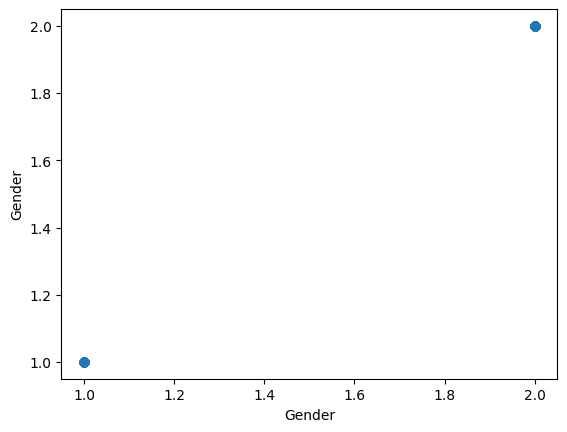

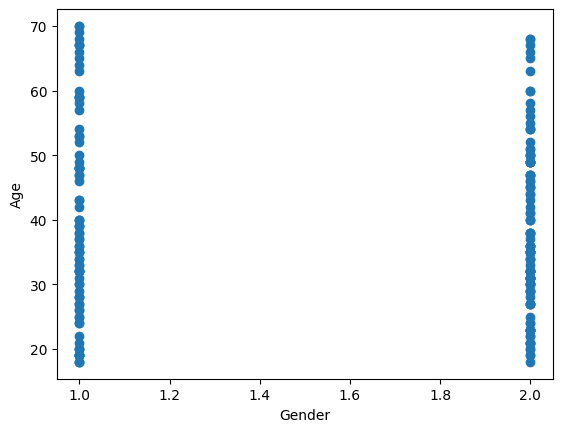

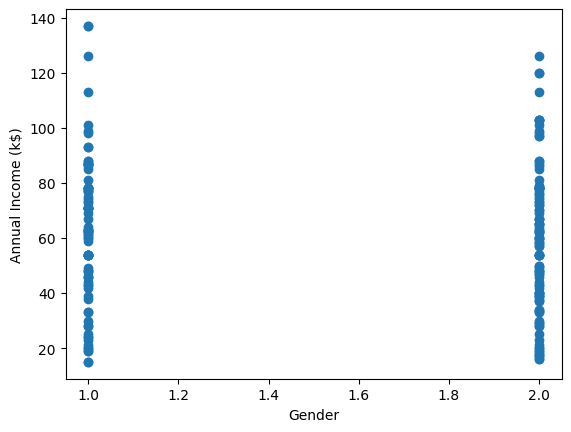

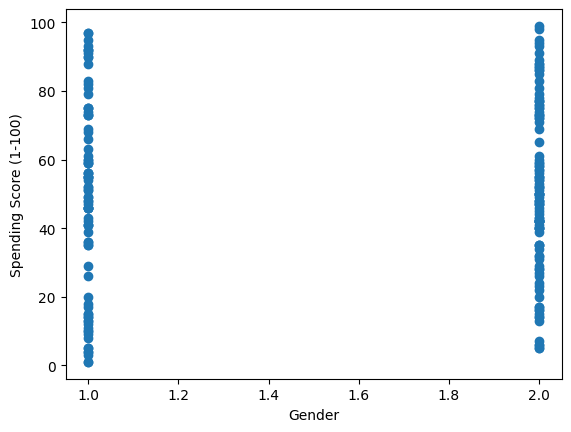

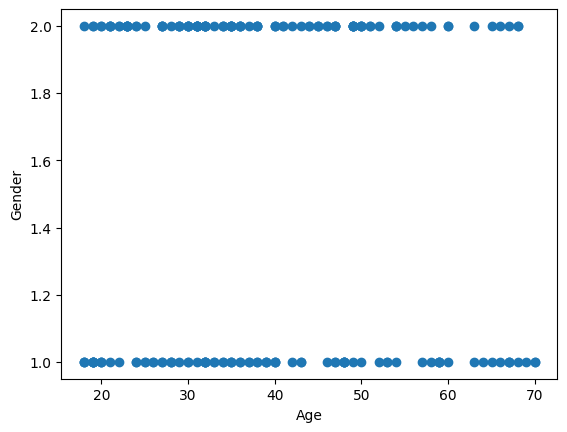

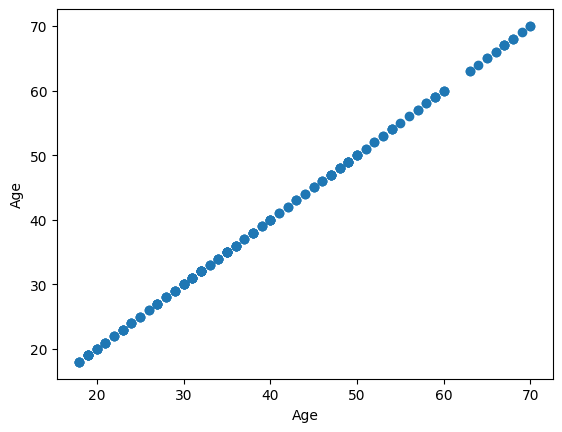

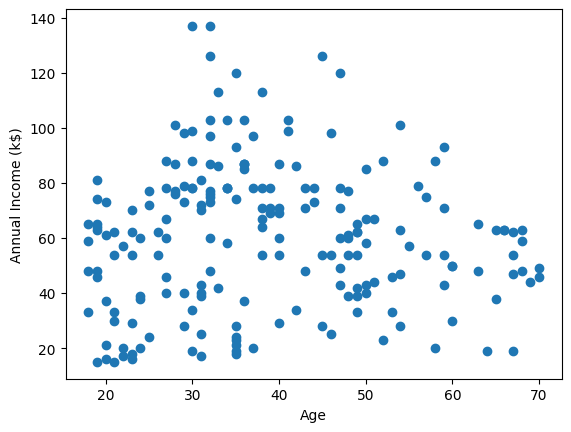

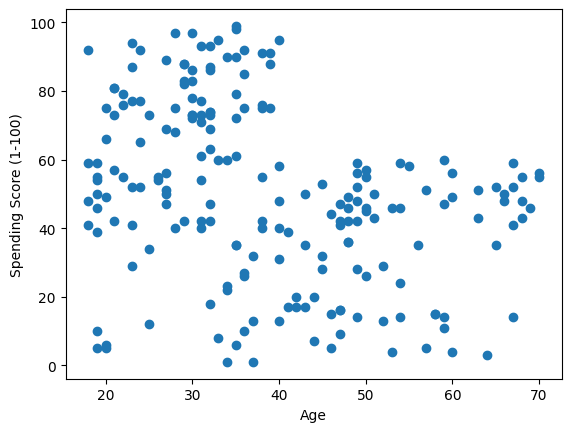

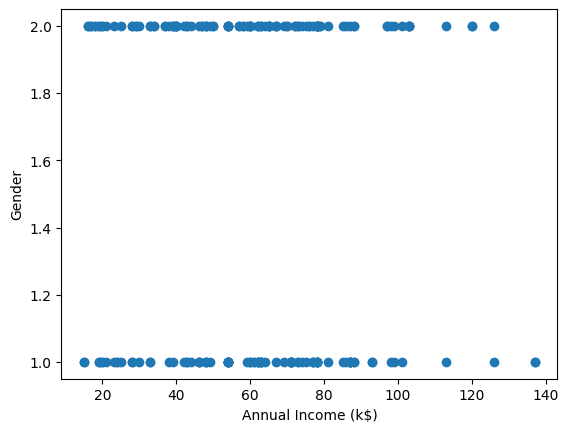

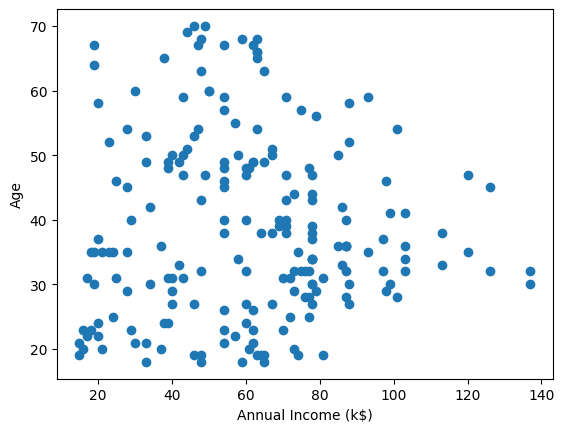

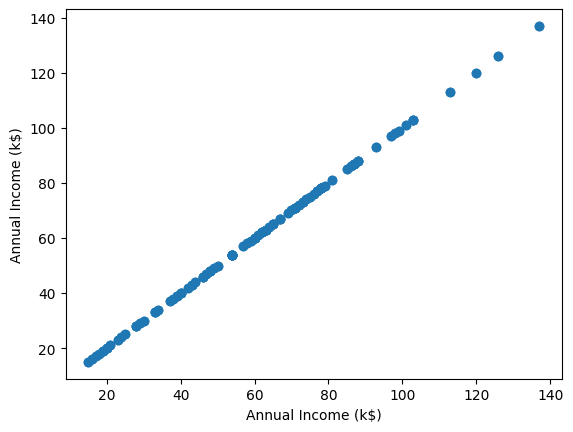

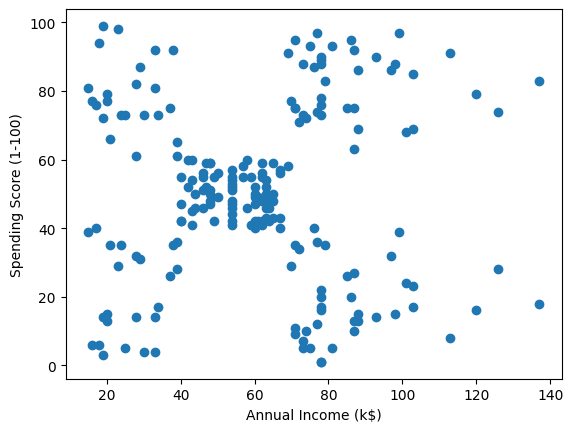

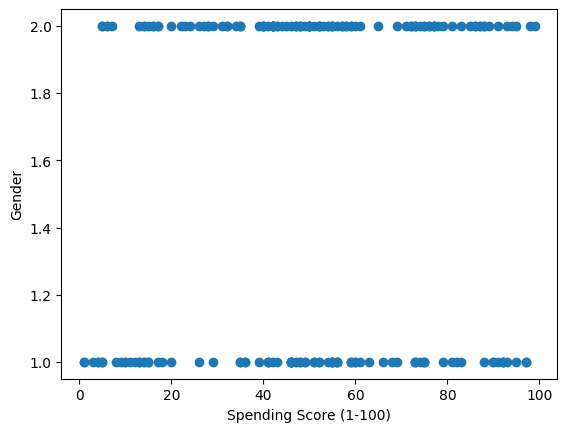

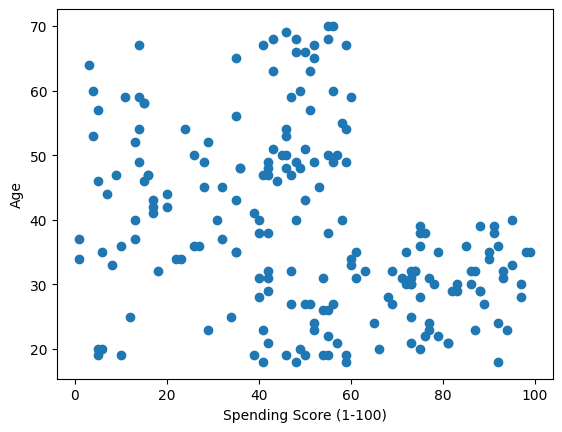

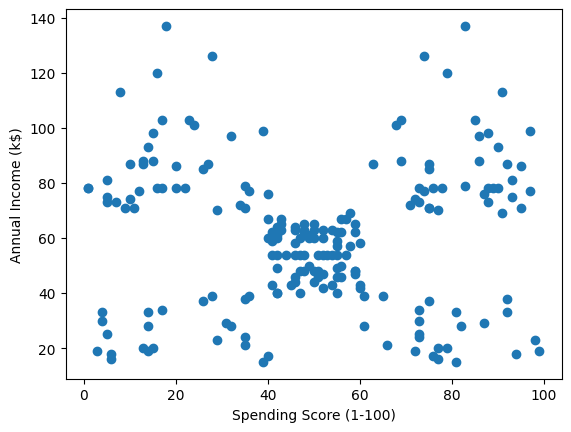

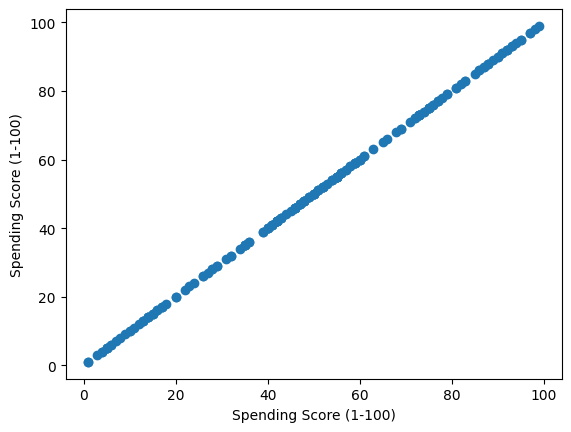

In [13]:
for i in df.columns:
    for j in df.columns:
        plt.scatter(df[i],df[j])
        plt.xlabel(i)
        plt.ylabel(j)
        plt.show()

In [14]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40


# KMeans

In [15]:
from sklearn.cluster import KMeans

In [16]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(df)

In [17]:
df['clusters'] = clusters
df['clusters'].unique()

array([0, 1, 2])

In [18]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,19,15,39,0
1,1,21,15,81,0
2,2,20,16,6,0
3,2,23,16,77,0
4,2,31,17,40,0


In [19]:
df['clusters'].value_counts()

0    123
1     39
2     38
Name: clusters, dtype: int64

# silhouette

Implementation : https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
https://medium.com/@cmukesh8688/silhouette-analysis-in-k-means-clustering-cefa9a7ad111

About silhouette score and silhouette samples : 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html

betweenx : 
https://www.youtube.com/watch?v=NfjMtTM9Ip0

In [20]:
silhouette_avg = silhouette_score(df, clusters)
silhouette_avg

0.3841137830550507

In [21]:
sample_silhouette_values = silhouette_samples(df, clusters)
len(sample_silhouette_values)

200

In [22]:
sample_silhouette_values

array([ 4.09867040e-01,  2.85359948e-01,  1.93107830e-01,  3.20360943e-01,
        4.52292098e-01,  3.23443946e-01,  2.07863732e-01,  1.73679626e-01,
        1.67899069e-01,  3.70882194e-01,  2.41802247e-01,  1.42802339e-01,
        2.68059883e-01,  3.17057066e-01,  2.62215224e-01,  2.94085095e-01,
        4.36439150e-01,  3.76933158e-01,  3.85615112e-01,  1.25753169e-01,
        4.37567579e-01,  3.42589501e-01,  1.67812143e-01,  3.54842956e-01,
        2.31268628e-01,  2.45572171e-01,  4.15325827e-01,  4.52711255e-01,
        4.05467199e-01,  1.68539393e-01,  1.12881756e-01,  3.00424098e-01,
        8.86752995e-02,  5.92655765e-02,  1.98342567e-01,  1.91087031e-01,
        2.24549867e-01,  3.05894431e-01,  3.04448691e-01,  2.14824793e-01,
        3.42033272e-01,  1.12219828e-04,  4.12343546e-01,  4.09172020e-01,
        3.16123441e-01,  3.33483159e-01,  4.80089330e-01,  4.72068640e-01,
        4.43455600e-01,  4.50943454e-01,  4.96940553e-01,  4.06787860e-01,
        4.48672475e-01,  

In [23]:
sample_silhouette_values.mean()

0.3841137830550507

In [24]:
ith_cluster_silhouette_values = sample_silhouette_values[clusters == 0]
len(ith_cluster_silhouette_values)

123

In [25]:
ith_cluster_silhouette_values.sort()
size_cluster_i=ith_cluster_silhouette_values.shape[0]

In [26]:
y_lower = 10
y_upper = y_lower + size_cluster_i
y_upper

133

In [27]:
y_lower = y_upper + 10
y_lower

143

In [28]:
df = df[['Annual Income (k$)','Spending Score (1-100)']]
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

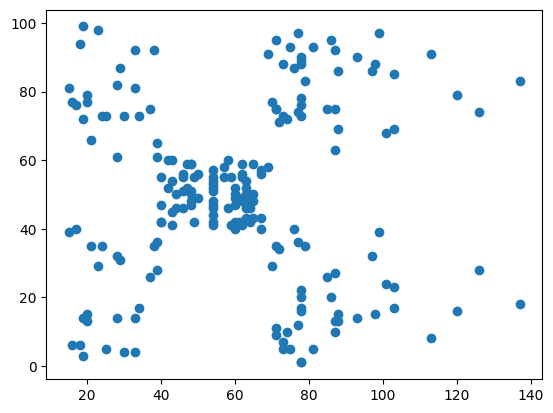

In [30]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [64]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df)
centroids  = km.cluster_centers_
print(centroids[:,0])
print(centroids[:,1])
print(centroids)

[44.15447154 86.53846154 87.        ]
[49.82926829 82.12820513 18.63157895]
[[44.15447154 49.82926829]
 [86.53846154 82.12820513]
 [87.         18.63157895]]


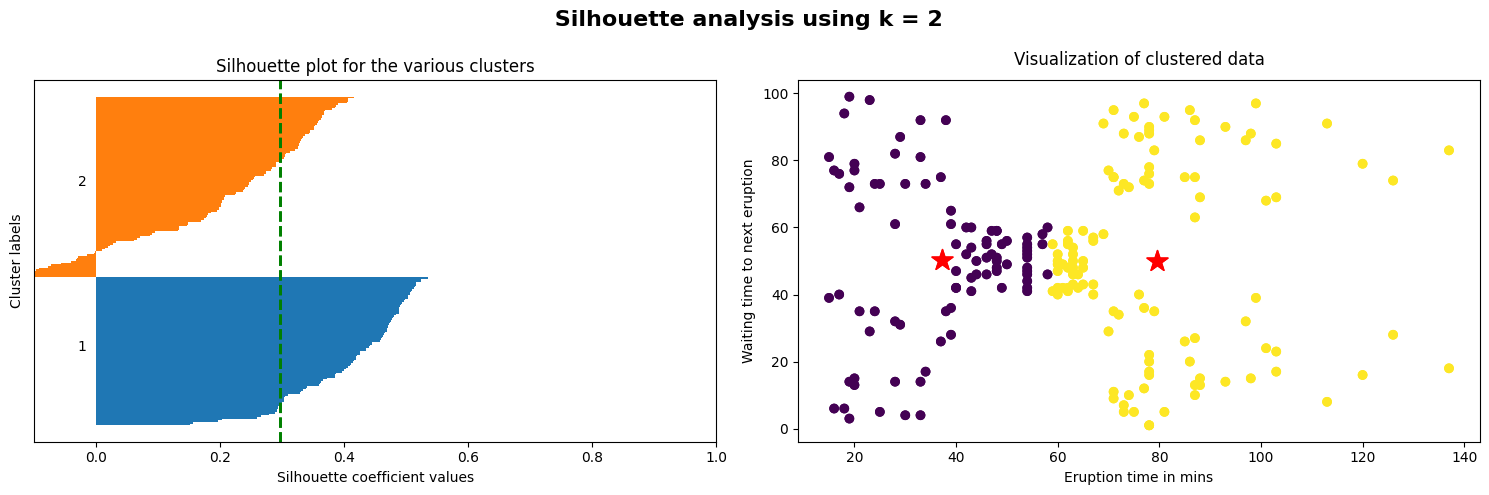

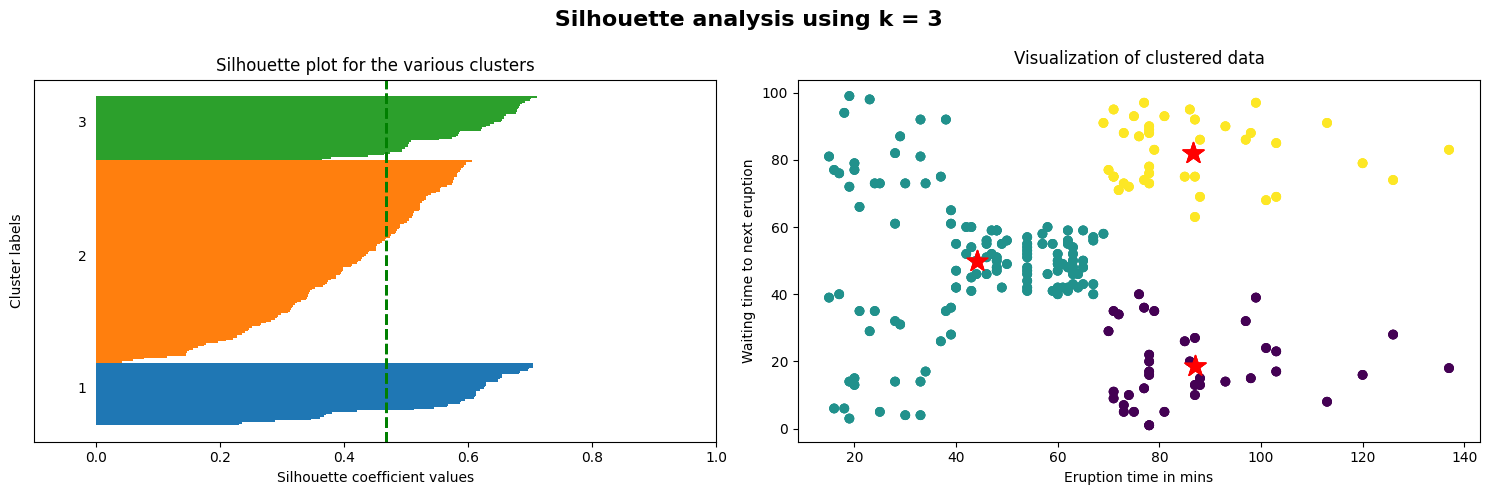

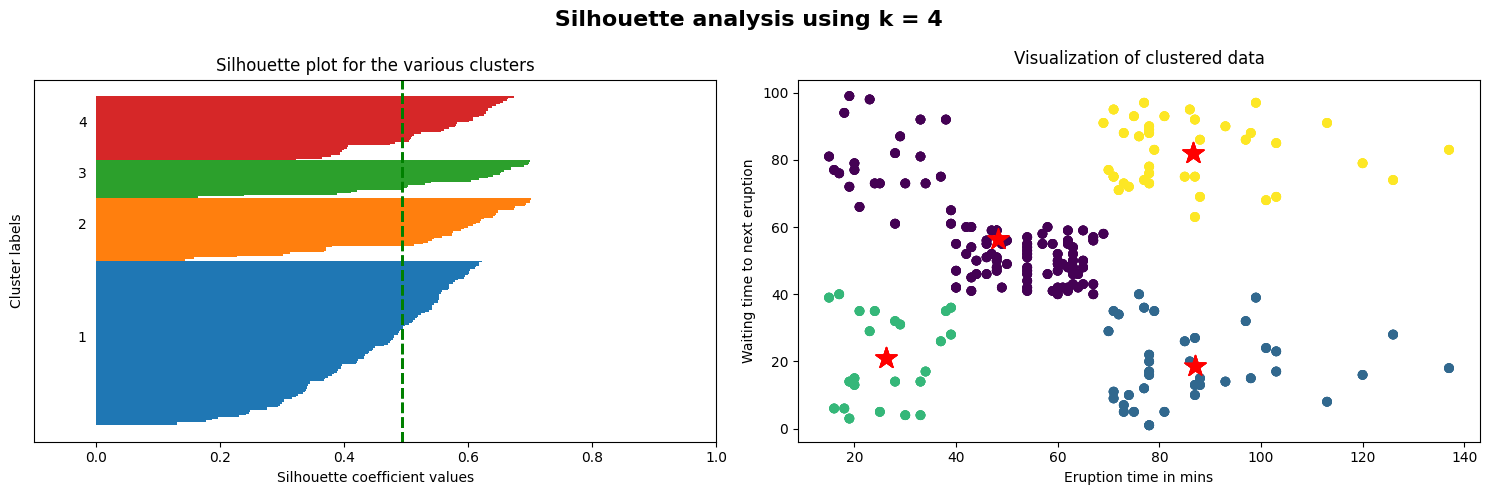

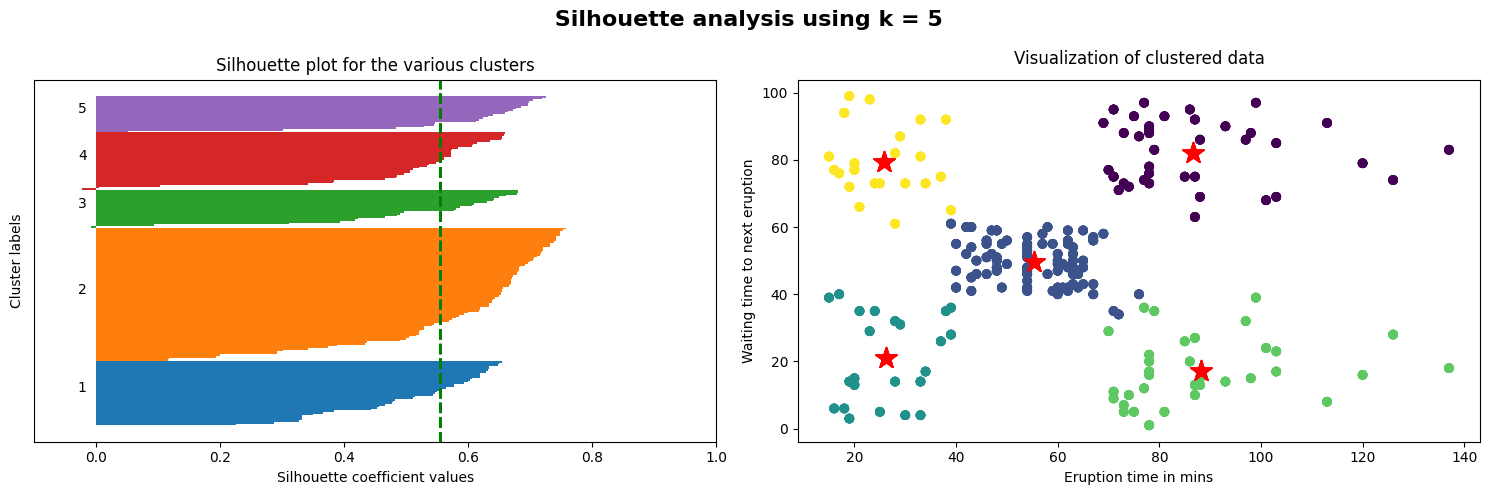

In [85]:
for i,k in enumerate([2,3,4,5]):
    
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    
    # Run the kmeans algorithm
    km = KMeans(n_clusters=k)
    y_predict = km.fit_predict(df)
    centroids  = km.cluster_centers_

    # get silhouette
    silhouette_vals = silhouette_samples(df,y_predict)
        #silhouette_vals
    # silhouette plot
    y_ticks = []
    y_lower = y_upper = 0
    y_lower=10
    for i,cluster in enumerate(np.unique(y_predict)):
        cluster_silhouette_vals = silhouette_vals[y_predict ==cluster]
        cluster_silhouette_vals.sort()
        y_upper = y_lower + len(cluster_silhouette_vals)

        ax[0].barh(range(y_lower,y_upper),
        cluster_silhouette_vals,height =1);
        ax[0].text(-0.03,(y_lower+y_upper)/2,str(i+1))
        y_lower = y_upper 
    

           # Get the average silhouette score 
        avg_score = np.mean(silhouette_vals)
        ax[0].axvline(avg_score,linestyle ='--',linewidth =2,color = 'green')
        ax[0].set_yticks([])
        ax[0].set_xlim([-0.1, 1])
        ax[0].set_xlabel('Silhouette coefficient values')
        ax[0].set_ylabel('Cluster labels')
        ax[0].set_title('Silhouette plot for the various clusters')


        # scatter plot of data colored with labels

        ax[1].scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'] , c = y_predict)
        ax[1].scatter(centroids[:,0],centroids[:,1],marker = '*' , c= 'r',s =250)
        ax[1].set_xlabel('Eruption time in mins')
        ax[1].set_ylabel('Waiting time to next eruption')
        ax[1].set_title('Visualization of clustered data', y=1.02)

        plt.tight_layout()
        plt.suptitle(f' Silhouette analysis using k = {k}',fontsize=16,fontweight = 'semibold')
        plt.savefig(f'Silhouette_analysis_{k}.jpg')